In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Етап": [
        "Відкрили додаток (сплеш)",
        "Надали дозвіл на ATT + Push",
        "Перейшли на 1-й екран онбордингу",
        "Перейшли на 2-й екран онбордингу",
        "Перейшли на 3-й екран онбордингу",
        "Побачили пейвол",
        "Пройшли на головний екран"
    ],
    "Кількість користувачів": [
        46596, 41470, 38674, 38208, 33083, 32617, 21434
    ]
}

df = pd.DataFrame(data)
df


,Етап,Кількість користувачів
0,Відкрили додаток (сплеш),46596
1,Надали дозвіл на ATT + Push,41470
2,Перейшли на 1-й екран онбордингу,38674
3,Перейшли на 2-й екран онбордингу,38208
4,Перейшли на 3-й екран онбордингу,33083
5,Побачили пейвол,32617
6,Пройшли на головний екран,21434


In [15]:
df['Конверсія'] = (df['Кількість користувачів'] / df['Кількість користувачів'].iloc[0]) * 100
df['Різниця конверсії'] = df['Конверсія'].diff().fillna(0)
df.to_csv('/home/redmoon/Documents/Dev/Avirise/data/data.csv', index=False)
df

,Етап,Кількість користувачів,Конверсія,Різниця конверсії
0,Відкрили додаток (сплеш),46596,100.000000,0.000000
1,Надали дозвіл на ATT + Push,41470,88.999056,-11.000944
2,Перейшли на 1-й екран онбордингу,38674,82.998541,-6.000515
3,Перейшли на 2-й екран онбордингу,38208,81.998455,-1.000086
4,Перейшли на 3-й екран онбордингу,33083,70.999657,-10.998798
5,Побачили пейвол,32617,69.999571,-1.000086
6,Пройшли на головний екран,21434,45.999657,-23.999914


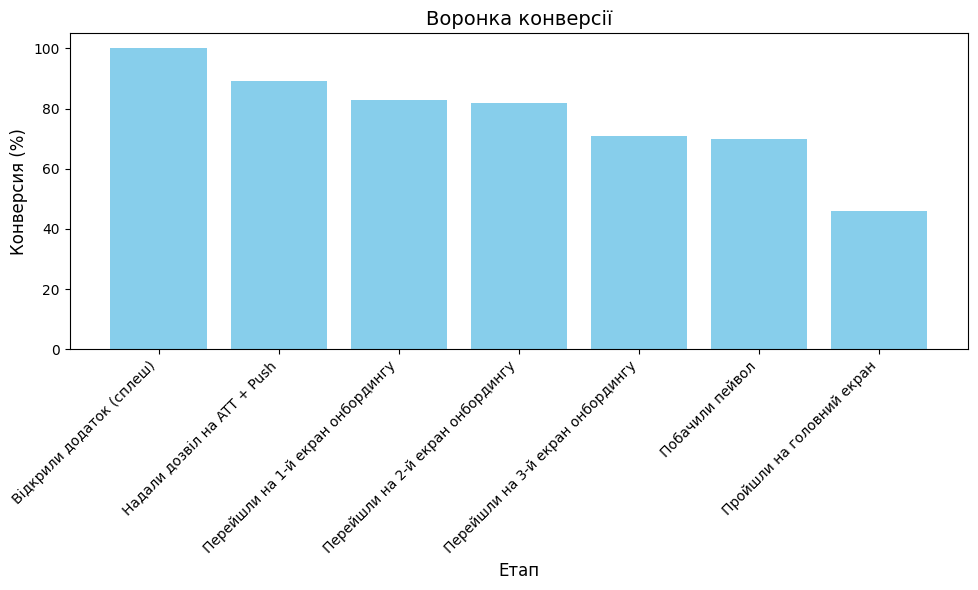

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df['Етап'], df['Конверсія'], color='skyblue')
plt.xlabel('Етап', fontsize=12)
plt.ylabel('Конверсия (%)', fontsize=12)
plt.title('Воронка конверсії', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1.2 Найбільше зниження конверсії спостерігається після пейволу

2. Виявлення проблемних місць
- Є кілька факторів, які можуть впливати на користувацький досвід — від технічних проблем, таких як повільне завантаження, до більш емоційних, як настрій користувачів. Однак, одразу кидається в очі великий банер про АТТ — він може бути надто агресивним і відлякувати до 11% користувачів, тому його варто зменшити. Також варто подумати про локалізацію контенту: залежно від мови користувача, на першому екрані онбордингу можна відображати його приблизну локацію для персоналізованого досвіду. Інформація про real-time оновлення виглядає зайвою, адже це має бути стандартом для будь-якого застосунку. Третій екран онбордингу я б перемістив після основного налаштування, аби не перевантажувати користувача на старті. Що стосується екрана пейволу, на мою думку, такі моменти краще показувати через кілька хвилин після першого знайомства з продуктом — це дозволить користувачеві спершу оцінити цінність застосунку, а не відлякатися відразу через ціну.
3. Формування гіпотез
- Зменшити агресивність пейволу, наприклад, показувати його після ознайомлення з основними функціями застосунку
- Оптимізувати текст і дизайн запиту на дозвіл ATT + Push, зробивши його більш дружнім і зрозумілим для користувача, а також пояснити переваги надання дозволу.
- Додати персоналізацію на етапах онбордингу, наприклад, показувати контент, що відповідає інтересам або локації користувача, щоб підвищити залученість. Зменшити кількість тексту на екрані пейволу, зайву інформацію прибрати до Terms of Use

In [18]:
# Data for the cohorts
data_cohort = {
    "Cohort": ["19 Apr", "24 Apr", "1 May", "8 May", "15 May"],
    "Subs on start": [53, 65, 50, 53, 61],
    "W2": [34, 42, 35, 37, 41],
    "W3": [28, 32, 28, 29, 32],
    "W4": [24, 26, 24, 25, None],
    "W5": [20, 21, 21, None, None],
    "W6": [17, 18, None, None, None],
    "W7": [15, None, None, None, None]
}

# Creating a DataFrame
df_cohort = pd.DataFrame(data_cohort)

df_cohort


,Cohort,Subs on start,W2,W3,W4,W5,W6,W7
0,19 Apr,53,34,28,24.0,20.0,17.0,15.0
1,24 Apr,65,42,32,26.0,21.0,18.0,NaN
2,1 May,50,35,28,24.0,21.0,NaN,NaN
3,8 May,53,37,29,25.0,NaN,NaN,NaN
4,15 May,61,41,32,NaN,NaN,NaN,NaN
